# Evaluate Data

In [1]:
import LoadData
import numpy as np
import pandas as pd
import tensorflow as tf
import EvaluationFunctions

2025-03-05 15:37:17.282161: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-05 15:37:17.290681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741189037.301326   29439 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741189037.304724   29439 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 15:37:17.316934: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Load the Model

In [2]:
# L1 Siamese Model without Sample Weights
# model_name = "SiameseModel"
# model_path = "./log/SiameseModel.keras"

# # L1 Siamese Model with Weighted 0 Samples
# model_name = "L1 Siamese Model Weighted 0 Scores"
# model_path = "./log/L1SiameseWeighted0Score.keras"

# L1 Siamese Model with Evenly Weighted Samples
# model_name = "L1 Siamese Model All Sasmples Weighted"
# model_path = "./log/L1SiameseAllWeights.keras"

# Test Model
# model_name = "Normalised Siamese Model"
# model_path = "./log/test.keras"

# Random
model_name = "Multi-Head Attention Model SGD Epoch 3"
model_path = "./log/SGDMultiHeadAttention/SGDMultiHeadAttention_6_32_checkpoint_3.keras"


# def exp_weighted_loss_function(y_true, y_pred, alpha = 1.4):
#     # Compute weight based on y_true using an exponential function
#     weight = tf.exp(alpha * (y_true - 0.5))

#     # Compute the Mean Squared Error
#     mse = tf.square(y_true - y_pred)

#     # Multiply the mse by the weight and return the mean loss
#     return tf.reduce_mean(weight * mse)

@tf.keras.utils.register_keras_serializable()
class ExpWeightedLossFunction(tf.keras.losses.Loss):
    def __init__(self, alpha=0.3, name="exp_weighted_loss_function", reduction=tf.keras.losses.Reduction.AUTO):
        super().__init__(name=name, reduction=reduction)
        self.alpha = alpha

    def call(self, y_true, y_pred):
        # Compute weight based on y_true using an exponential function
        # weight = tf.exp(self.alpha * (y_true - 0.5))
        weight = tf.exp(self.alpha * (y_true))

        # Compute the Mean Squared Error
        mse = tf.square(y_true - y_pred)

        # Multiply the mse by the weight and return the mean loss
        return tf.reduce_mean(weight * mse)

# Load the model
model = tf.keras.models.load_model(model_path, custom_objects={'ExpWeightedLossFunction': ExpWeightedLossFunction})

I0000 00:00:1741189038.659012   29439 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2269 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


## Evaluate Model's Performance

In [3]:
test_path = "./data/.temp/test.db"
batch_size = 32
sample_limit = 1000

### All Data Performance

#### Get Test Metrics

In [4]:
AllDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'All-Testing')
metric = model.evaluate(AllDataLoader)
print(f"Metrics: {model.metrics_names}")
print(metric)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset


I0000 00:00:1741189039.804401   29539 service.cc:148] XLA service 0x7413b0003930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741189039.804439   29539 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-03-05 15:37:19.818945: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741189039.862269   29539 cuda_dnn.cc:529] Loaded cuDNN version 90701
2025-03-05 15:37:19.886001: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2025

    102/Unknown 2s 2ms/step - loss: 8.9435e-04 - mae: 0.0674 - mape: 56150756.0000 - mse: 0.0196

I0000 00:00:1741189041.307171   29539 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  15602/Unknown 21s 1ms/step - loss: 8.4410e-04 - mae: 0.0648 - mape: 54153280.0000 - mse: 0.0185[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
  31233/Unknown 40s 1ms/step - loss: 8.5943e-04 - mae: 0.0648 - mape: 54010944.0000 - mse: 0.0184[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
  46871/Unknown 60s 1ms/step - loss: 8.6652e-04 - mae: 0.0648 - mape: 53977488.0000 - mse: 0.0183[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
  62466/Unknown 81s 1ms/step - loss: 8.6958e-04 - mae: 0.0648 - mape: 53976336.0000 - mse: 0.0183[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset
  93743/Unknown 121s 1ms/step - loss: 8.7219e-04 - mae: 0.0648 - mape: 53968652.0000 - mse: 0.0183
Size of dataset (All-Testing): 3000000
93750/93750 ━━━━━━━━━━━━━━━━━━━━ 122s 1ms/step - loss: 8.7219e-04 - mae: 0.0648 - mape: 53968652.0

2025-03-05 15:39:20.720725: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-05 15:39:20.720774: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2025-03-05 15:39:20.720787: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2318933993080900057
2025-03-05 15:39:20.720795: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 9134144711609459503
2025-03-05 15:39:20.720802: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 338146806544245959
2025-03-05 15:39:20.720823: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 12466076151874446344
/home/chuon

#### Get True vs Predicted Graph

In [5]:
AllDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'All-Testing')
y_pred = model.predict(AllDataLoader)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
  15595/Unknown 19s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
  31220/Unknown 38s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
  46840/Unknown 58s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
  62479/Unknown 78s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset
 

In [6]:
AllDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'All-Testing')
y_true = np.concatenate([labels for _, labels, _ in AllDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset

Size of dataset (All-Testing): 3000000


2025-03-05 15:42:16.242355: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


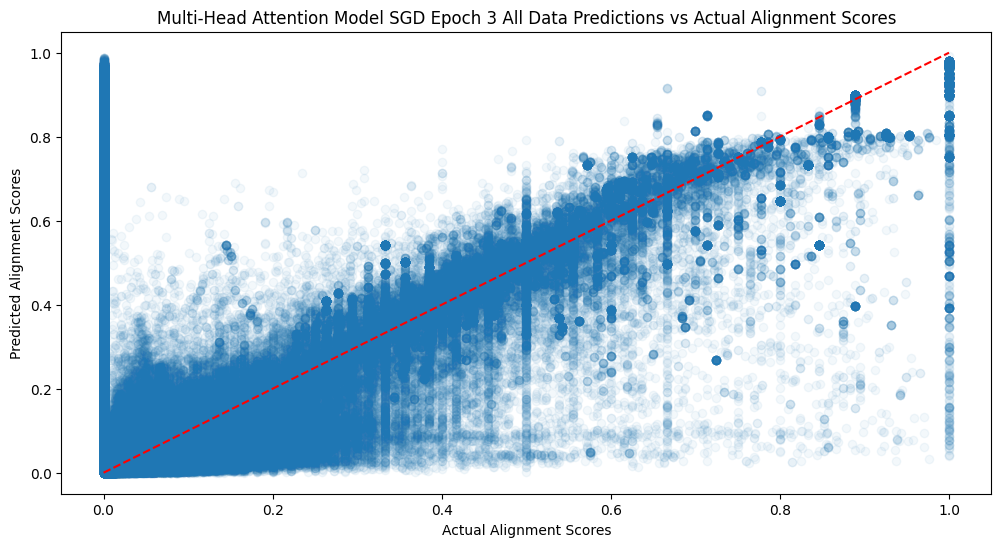

In [7]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} All Data")

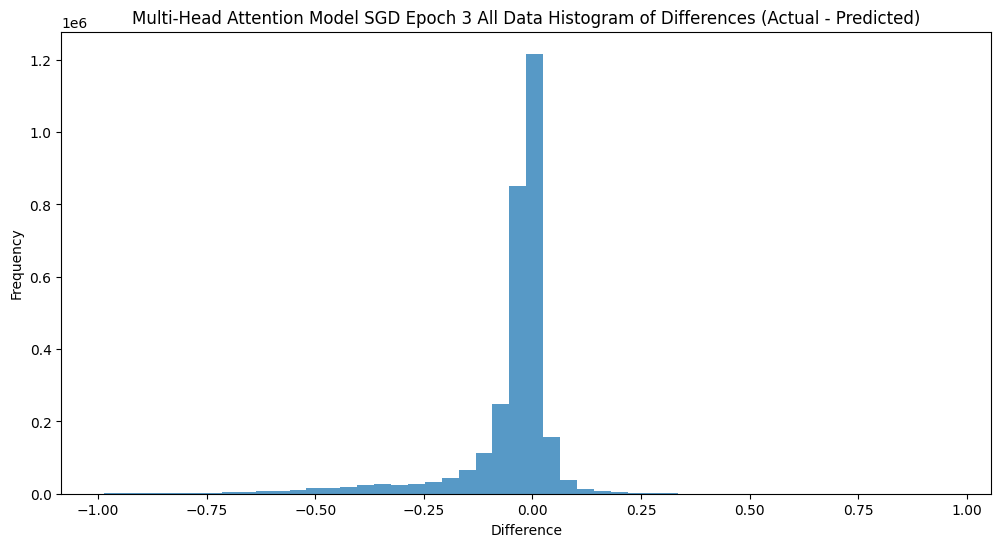

In [8]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} All Data")

### Non-Zero Data Performance

#### Get Test Metrics

In [9]:
condition = lambda x : x != 0
NonZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'NonZero-Testing', condition = condition)
metric = model.evaluate(NonZeroDataLoader)
print(metric)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
   7823/Unknown 10s 1ms/step - loss: 0.0016 - mae: 0.0213 - mape: 70.9117 - mse: 0.0016[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
  15598/Unknown 20s 1ms/step - loss: 0.0017 - mae: 0.0215 - mape: 71.3007 - mse: 0.0017[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
  23450/Unknown 30s 1ms/step - loss: 0.0017 - mae: 0.0215 - mape: 71.4106 - mse: 0.0017[load_npz_arrays] Loading file ./data/.t

2025-03-05 15:43:21.483648: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2318933993080900057
2025-03-05 15:43:21.483680: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 9134144711609459503
2025-03-05 15:43:21.483692: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 338146806544245959
2025-03-05 15:43:21.483707: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 12466076151874446344


#### Get True vs Predicted Graph

In [10]:
NonZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'NonZero-Testing', condition = condition)
y_pred = model.predict(NonZeroDataLoader)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
   7802/Unknown 10s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
  15615/Unknown 19s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
  23447/Unknown 28s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
  31234/Unknown 38s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset
 

In [11]:
NonZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'NonZero-Testing', condition = condition)
y_true = np.concatenate([labels for _, labels, _ in NonZeroDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset

Size of dataset (NonZero-Testing): 1500222


2025-03-05 15:44:47.700583: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


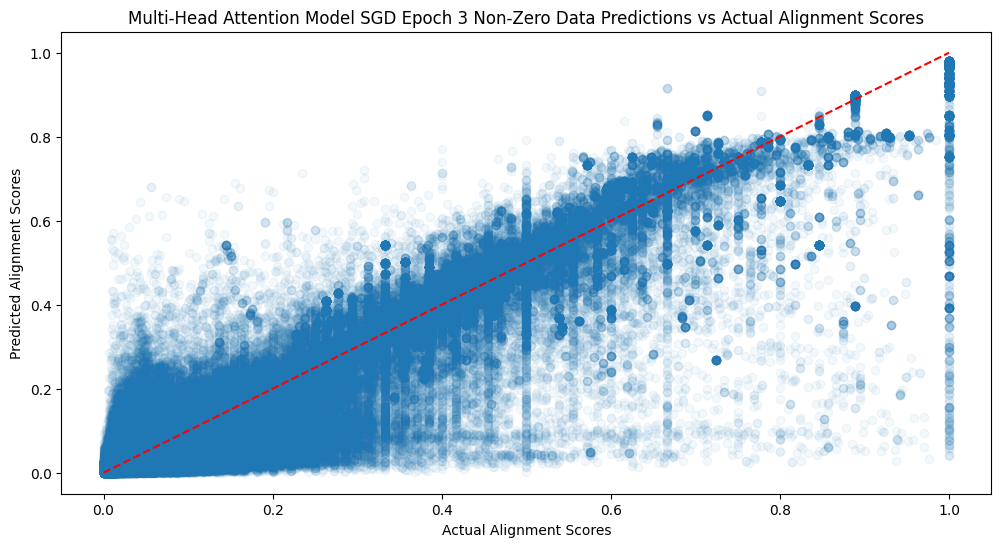

In [12]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} Non-Zero Data")

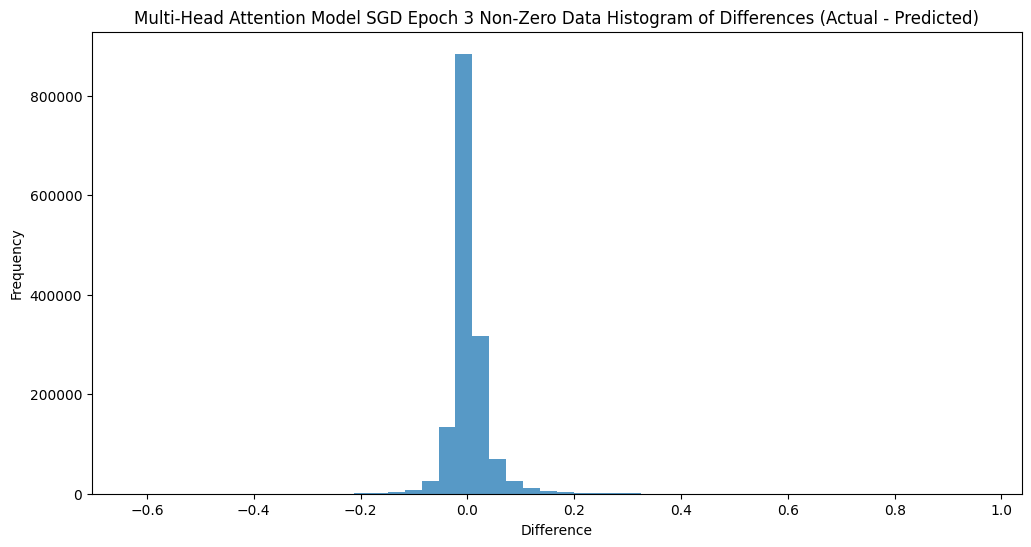

In [13]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} Non-Zero Data")

### Zero Data Performance

#### Get Test Metrics

In [14]:
condition = lambda x : x == 0
ZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore == 0', condition=condition)
metric = model.evaluate(NonZeroDataLoader)
print(metric)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
   7823/Unknown 10s 1ms/step - loss: 0.0016 - mae: 0.0213 - mape: 70.9117 - mse: 0.0016[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
  15613/Unknown 20s 1ms/step - loss: 0.0017 - mae: 0.0215 - mape: 71.3010 - mse: 0.0017[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
  23455/Unknown 31s 1ms/step - loss: 0.0017 - mae: 0.0215 - mape: 71.4107 - mse: 0.0017[load_npz_arrays] Loading file ./data/.t

2025-03-05 15:45:52.870401: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2318933993080900057
2025-03-05 15:45:52.870426: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 9134144711609459503
2025-03-05 15:45:52.870430: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 338146806544245959
2025-03-05 15:45:52.870436: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 12466076151874446344


#### Get True vs Predicted Graph

In [15]:
ZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore == 0', condition=condition)
y_pred = model.predict(ZeroDataLoader)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
   7764/Unknown 10s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
  15597/Unknown 20s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
  23378/Unknown 30s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
  31188/Unknown 40s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset
 

In [16]:
ZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore == 0', condition=condition)
y_true = np.concatenate([labels for _, labels, _ in ZeroDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset

Size of dataset (WHERE AlignmentScore == 0): 1499778


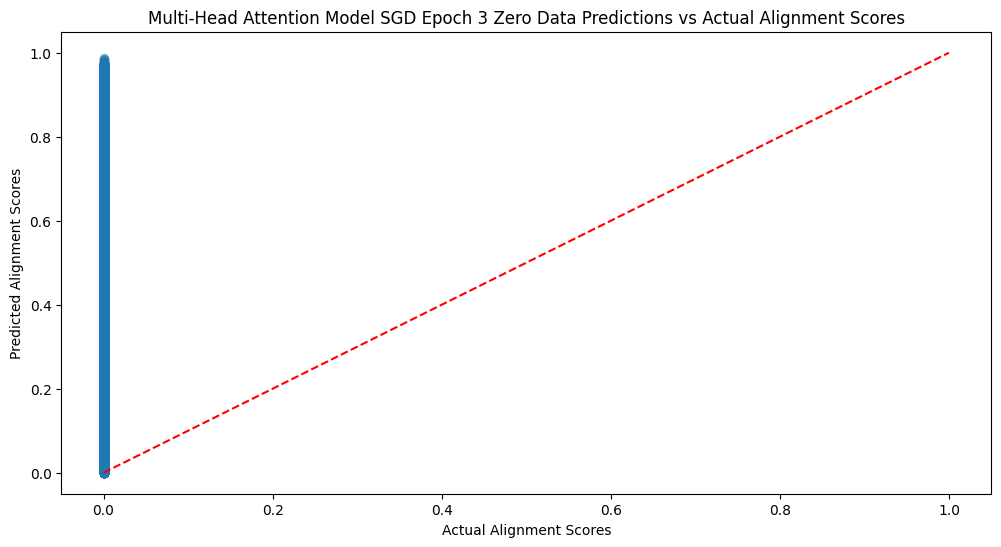

In [17]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} Zero Data")

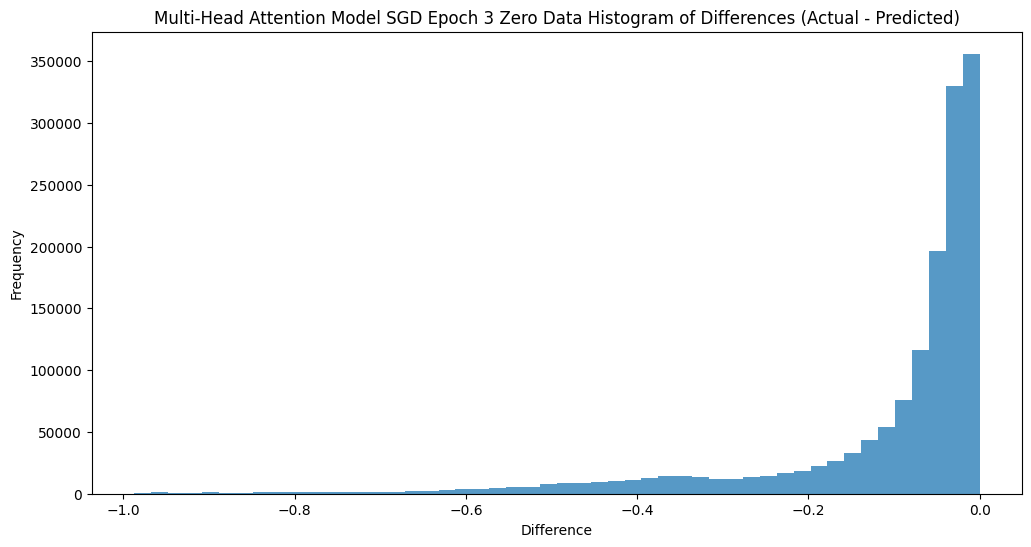

In [18]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} Zero Data")

### Non-Zero and Non-One Data Performance

#### Get Test Metrics

In [19]:
condition = lambda x: (x != 0) & (x != 1)
NonZeroNonOneDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore != 0 AND AlignmentScore != 1', condition=condition)
metric = model.evaluate(NonZeroNonOneDataLoader)
print(metric)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
   7780/Unknown 11s 1ms/step - loss: 0.0015 - mae: 0.0211 - mape: 71.0924 - mse: 0.0015[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
  15565/Unknown 22s 1ms/step - loss: 0.0016 - mae: 0.0212 - mape: 71.4888 - mse: 0.0016[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
  23377/Unknown 33s 1ms/step - loss: 0.0016 - mae: 0.0213 - mape: 71.5994 - mse: 0.0016[load_npz_arrays] Loading file ./data/.t

2025-03-05 15:48:38.536167: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2318933993080900057
2025-03-05 15:48:38.536193: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 9134144711609459503
2025-03-05 15:48:38.536198: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 338146806544245959
2025-03-05 15:48:38.536205: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 12466076151874446344


#### Get True vs Predicted Graph

In [20]:
NonZeroNonOneDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore != 0 AND AlignmentScore != 1', condition=condition)
y_pred = model.predict(NonZeroNonOneDataLoader)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
   7790/Unknown 10s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
  15554/Unknown 20s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
  23345/Unknown 31s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
  31145/Unknown 41s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 294
Using new dataset
  4

In [21]:
NonZeroNonOneDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore != 0 AND AlignmentScore != 1', condition=condition)
y_true = np.concatenate([labels for _, labels, _ in NonZeroNonOneDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset

Size of dataset (WHERE AlignmentScore != 0 AND AlignmentScore != 1): 1495600


2025-03-05 15:50:09.644031: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


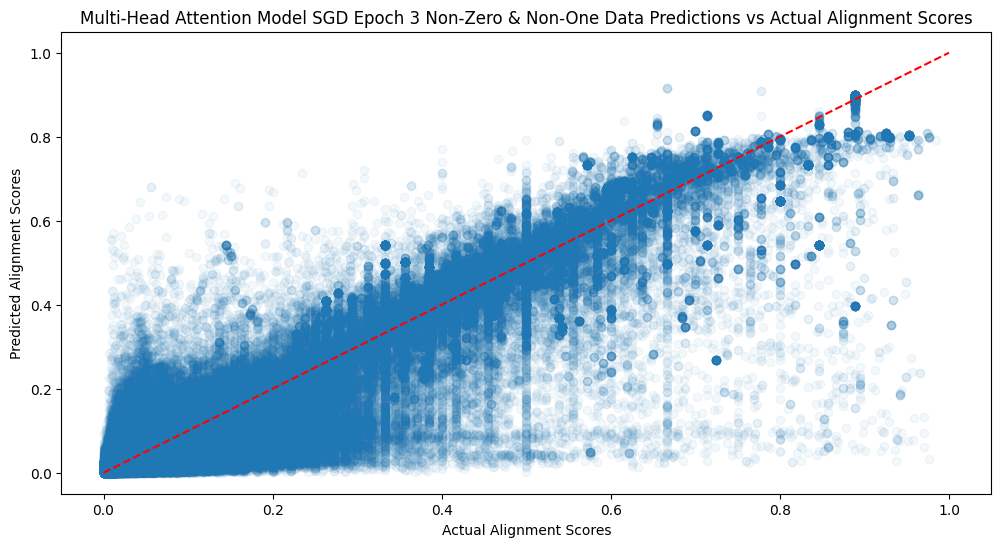

In [22]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} Non-Zero & Non-One Data")

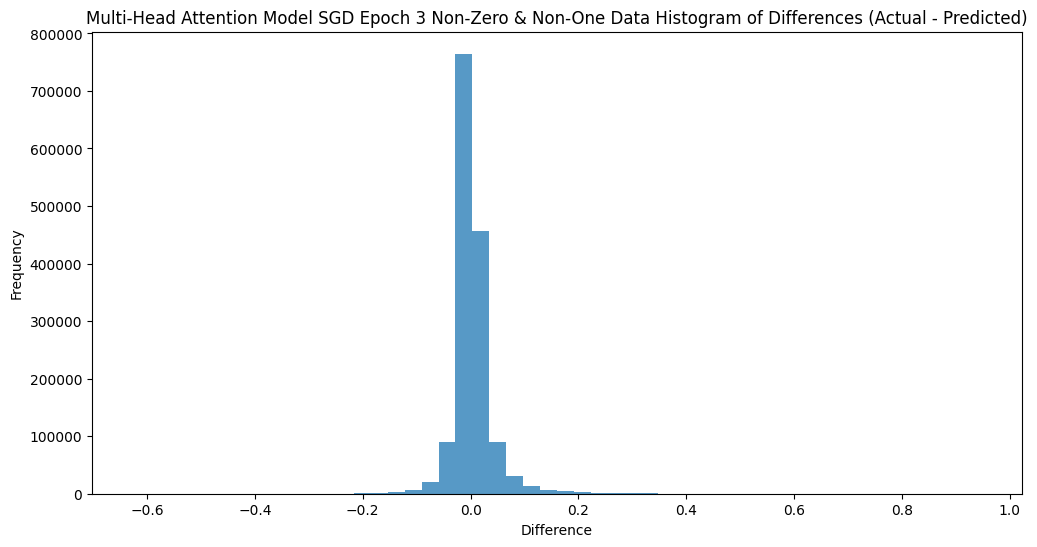

In [23]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} Non-Zero & Non-One Data")

### > 0.5  Data Points

#### Get Test Metrics

In [24]:
condition = lambda x : (x > 0.5) & (x < 1)
HighDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore >= 0.5 AND AlignmentScore < 1', condition = condition)
metric = model.evaluate(HighDataLoader)
print(metric)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
     93/Unknown 1s 2ms/step - loss: 0.0234 - mae: 0.0924 - mape: 13.8298 - mse: 0.0234[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
    239/Unknown 1s 2ms/step - loss: 0.0247 - mae: 0.0952 - mape: 14.2704 - mse: 0.0247[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
    346/Unknown 1s 2ms/step - loss: 0.0250 - mae: 0.0958 - mape: 14.3652 - mse: 0.0250[load_npz_arrays] Loading file ./data/.temp

2025-03-05 15:50:15.357981: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 2318933993080900057
2025-03-05 15:50:15.358017: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 9134144711609459503
2025-03-05 15:50:15.358029: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 338146806544245959
2025-03-05 15:50:15.358048: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 12466076151874446344


#### Get True VS Predicted Graph

In [25]:
HighDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore >= 0.5 AND AlignmentScore < 1', condition = condition)
y_pred = model.predict(HighDataLoader)

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
    102/Unknown 0s 2ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
    221/Unknown 1s 2ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
    364/Unknown 1s 2ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
    462/Unknown 2s 3ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset
    6

In [26]:
HighDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore >= 0.5 AND AlignmentScore < 1', condition = condition)
y_true = np.concatenate([labels for _, labels, _ in HighDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 29439
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 29439
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 29439
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 29439
Using new dataset

Size of dataset (WHERE AlignmentScore >= 0.5 AND AlignmentScore < 1): 23399


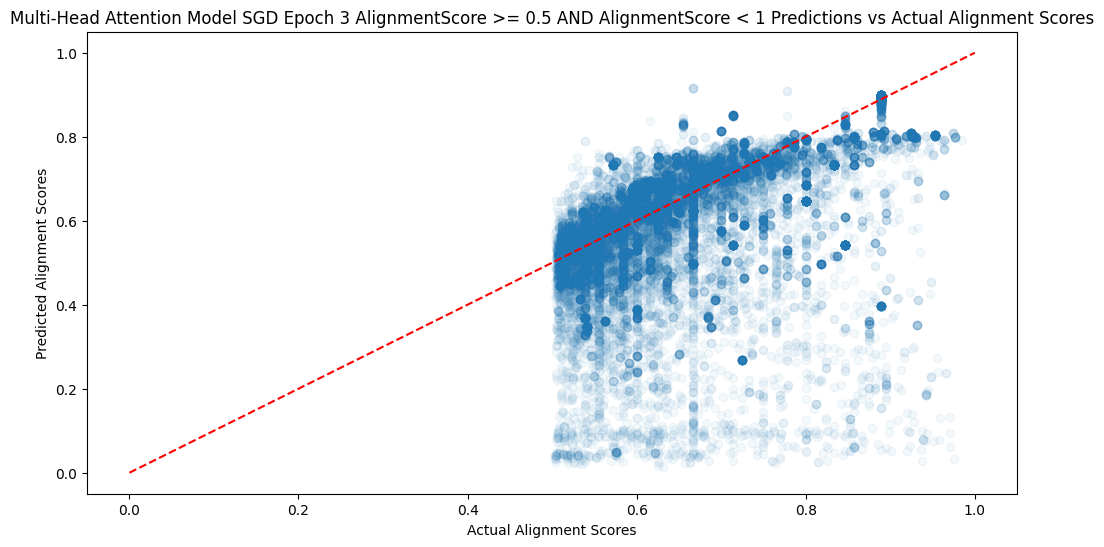

In [27]:
import importlib
importlib.reload(EvaluationFunctions)
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} AlignmentScore >= 0.5 AND AlignmentScore < 1")

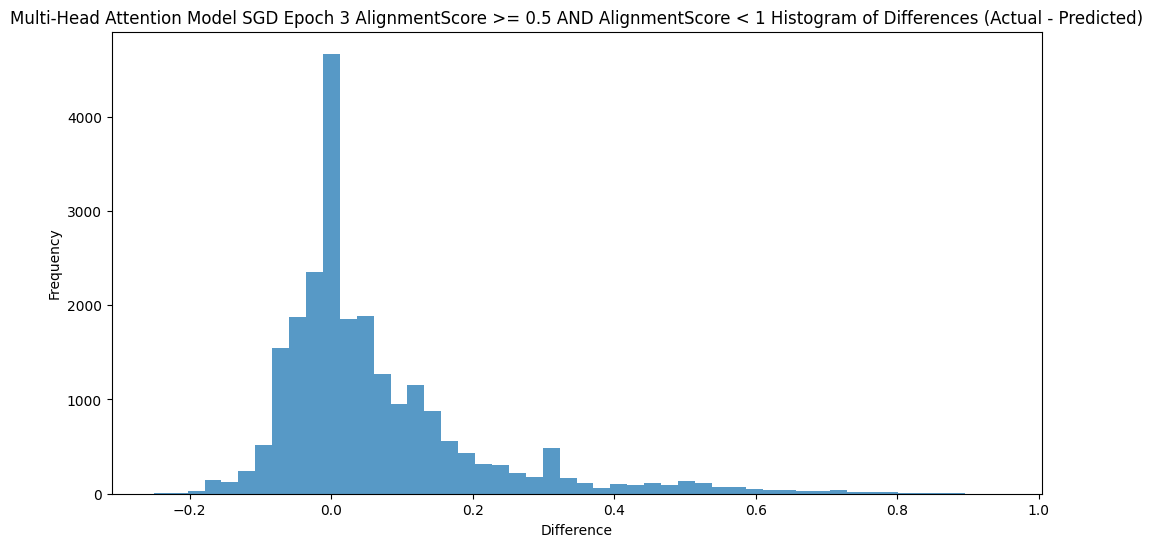

In [28]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} AlignmentScore >= 0.5 AND AlignmentScore < 1")

In [29]:
np.unique(y_true, return_counts=True)

(array([0.5030675 , 0.50340134, 0.50344825, ..., 0.97590363, 0.97619045,
        0.9848485 ], dtype=float32),
 array([ 1,  1,  1, ...,  1, 11,  1]))

In [30]:
np.unique(y_pred, return_counts=True)

(array([0.01331053, 0.01699809, 0.02077718, ..., 0.9078879 , 0.91249543,
        0.9159415 ], dtype=float32),
 array([1, 1, 1, ..., 2, 1, 4]))